<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 1 

1. Набор данных beans 

2. Классы с метками 0,1,2 

# Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image, ImageOps

In [2]:
ds_train = tfds.load("beans", split='train')
df_train = tfds.as_dataframe(ds_train)
df_train.head(3)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteYA3PS5/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteYA3PS5/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteYA3PS5/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


,image,label
0,"[[[149, 132, 106], [141, 124, 98], [134, 118, ...",1
1,"[[[97, 88, 57], [97, 86, 56], [105, 91, 64], [...",1
2,"[[[60, 146, 85], [61, 147, 86], [71, 153, 91],...",0


# Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки. 

Загрузим из обучающей выборки первое изображение:

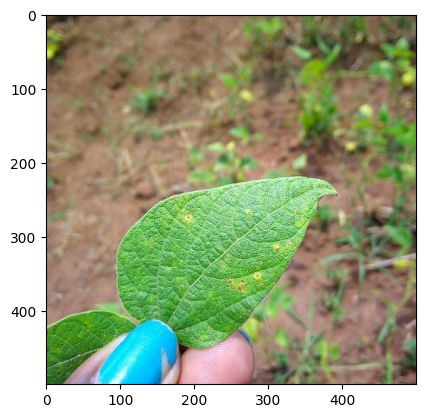

In [3]:
img = Image.fromarray(df_train.iloc[1]['image'])
plt.imshow(img);

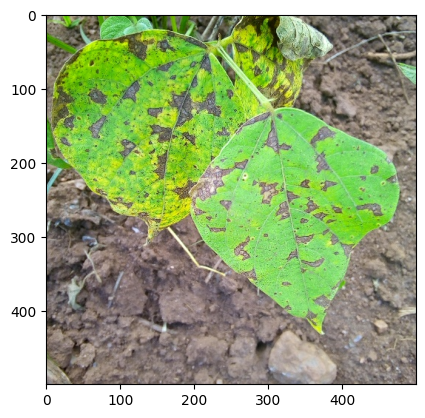

In [4]:
img2 = Image.fromarray(df_train.iloc[10]['image'])
plt.imshow(img2);

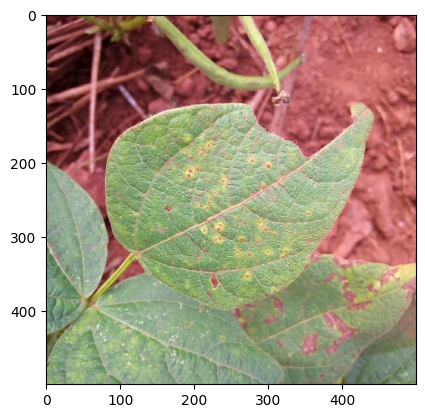

In [5]:
img3 = Image.fromarray(df_train.iloc[45]['image'])
plt.imshow(img3);

три канала:

In [6]:
np.array(img).shape

(500, 500, 3)

Чтобы упростить работу с изображением, перейдем к изображению с оттенками серого:

In [7]:
img = ImageOps.grayscale(img)
np.array(img).shape

(500, 500)

In [8]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

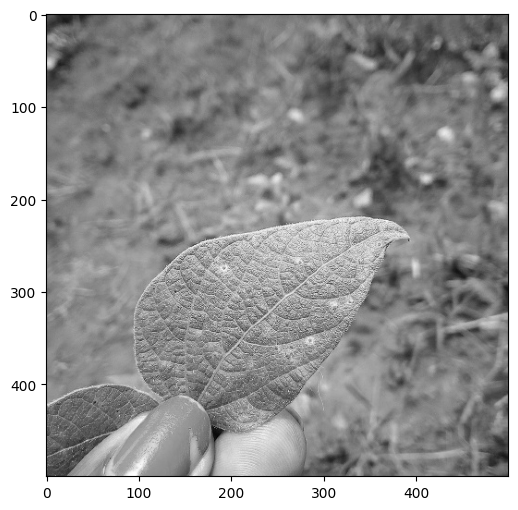

In [9]:
plot_image(img=img)

# Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (архитектура сетей по вашему усмотрению).  

In [3]:
ds = tfds.load("beans", split=['train','test'])
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

((1034, 2), (128, 2))

In [4]:
df_train = df_train.loc[df_train['label'].isin([0, 1])]

In [5]:
df_test = df_test.loc[df_test['label'].isin([0, 1])]

In [6]:
df_train.iloc[0]['image'].shape

(500, 500, 3)

In [7]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((693,), (86,))

In [8]:
train_images = np.zeros(shape=(df_train.shape[0],500,500,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],500,500,3), dtype=np.float32)
train_images.shape, test_images.shape

((693, 500, 500, 3), (86, 500, 500, 3))

In [9]:
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = \
        np.array(Image.fromarray(df_train.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = \
        np.array(Image.fromarray(df_test.iloc[idx]['image']))

train_images.shape, test_images.shape

((693, 500, 500, 3), (86, 500, 500, 3))

In [10]:
train_images /= 255
test_images  /= 255

In [18]:
df_train.sample(10)

,image,label
233,"[[[144, 98, 48], [164, 118, 68], [180, 132, 84...",1
836,"[[[101, 76, 45], [96, 71, 40], [93, 68, 37], [...",1
85,"[[[41, 45, 22], [59, 63, 40], [76, 81, 59], [7...",0
36,"[[[225, 171, 147], [226, 172, 148], [226, 172,...",1
415,"[[[42, 27, 20], [32, 17, 10], [21, 6, 0], [37,...",1
333,"[[[64, 71, 27], [61, 67, 21], [113, 112, 64], ...",0
220,"[[[151, 139, 81], [155, 143, 83], [157, 147, 8...",0
139,"[[[200, 206, 168], [198, 205, 164], [184, 189,...",0
218,"[[[4, 6, 5], [4, 6, 5], [4, 6, 5], [4, 6, 5], ...",1
496,"[[[50, 41, 0], [47, 38, 0], [51, 38, 3], [51, ...",0


In [19]:
df_train.shape, df_test.shape

((693, 2), (86, 2))

In [20]:
train_images

array([[[[0.58431375, 0.5176471 , 0.41568628],
         [0.5529412 , 0.4862745 , 0.38431373],
         [0.5254902 , 0.4627451 , 0.37254903],
         ...,
         [0.5058824 , 0.59607846, 0.2509804 ],
         [0.5058824 , 0.59607846, 0.2509804 ],
         [0.50980395, 0.6       , 0.25490198]],

        [[0.5921569 , 0.5254902 , 0.42352942],
         [0.54901963, 0.4862745 , 0.38431373],
         [0.52156866, 0.45882353, 0.36862746],
         ...,
         [0.49411765, 0.58431375, 0.23921569],
         [0.49803922, 0.5882353 , 0.24313726],
         [0.49803922, 0.5882353 , 0.24313726]],

        [[0.5882353 , 0.5254902 , 0.42352942],
         [0.54901963, 0.4862745 , 0.38431373],
         [0.52156866, 0.45882353, 0.36862746],
         ...,
         [0.49411765, 0.5921569 , 0.23529412],
         [0.49019608, 0.5882353 , 0.23137255],
         [0.47843137, 0.5764706 , 0.21960784]],

        ...,

        [[0.07843138, 0.12941177, 0.19215687],
         [0.08235294, 0.13333334, 0.19607843]

## MLP

В качестве функции потерь используется бинарная кросс-энтропия.

In [11]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(500, 500, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_data=(test_images, test_labels))

Epoch 1/10
6/6 [==============================] - 19s 3s/step - loss: 141.2750 - accuracy: 0.5180 - val_loss: 32.2993 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 17s 3s/step - loss: 35.8744 - accuracy: 0.5065 - val_loss: 21.4355 - val_accuracy: 0.5581
Epoch 3/10
6/6 [==============================] - 16s 3s/step - loss: 16.7969 - accuracy: 0.6147 - val_loss: 10.4052 - val_accuracy: 0.6977
Epoch 4/10
6/6 [==============================] - 16s 3s/step - loss: 14.8539 - accuracy: 0.6349 - val_loss: 8.7041 - val_accuracy: 0.7326
Epoch 5/10
6/6 [==============================] - 16s 3s/step - loss: 8.7822 - accuracy: 0.6753 - val_loss: 26.8558 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 16s 3s/step - loss: 21.9212 - accuracy: 0.5498 - val_loss: 14.9886 - val_accuracy: 0.5349
Epoch 7/10
6/6 [==============================] - 16s 3s/step - loss: 15.0415 - accuracy: 0.5556 - val_loss: 24.7008 - val_accuracy: 0.5000
Epoch 8/10
6/6 [=====

## CNN

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), 
                           input_shape=(500, 500, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), 
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_2 = model_2.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/10


# Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. 

In [12]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

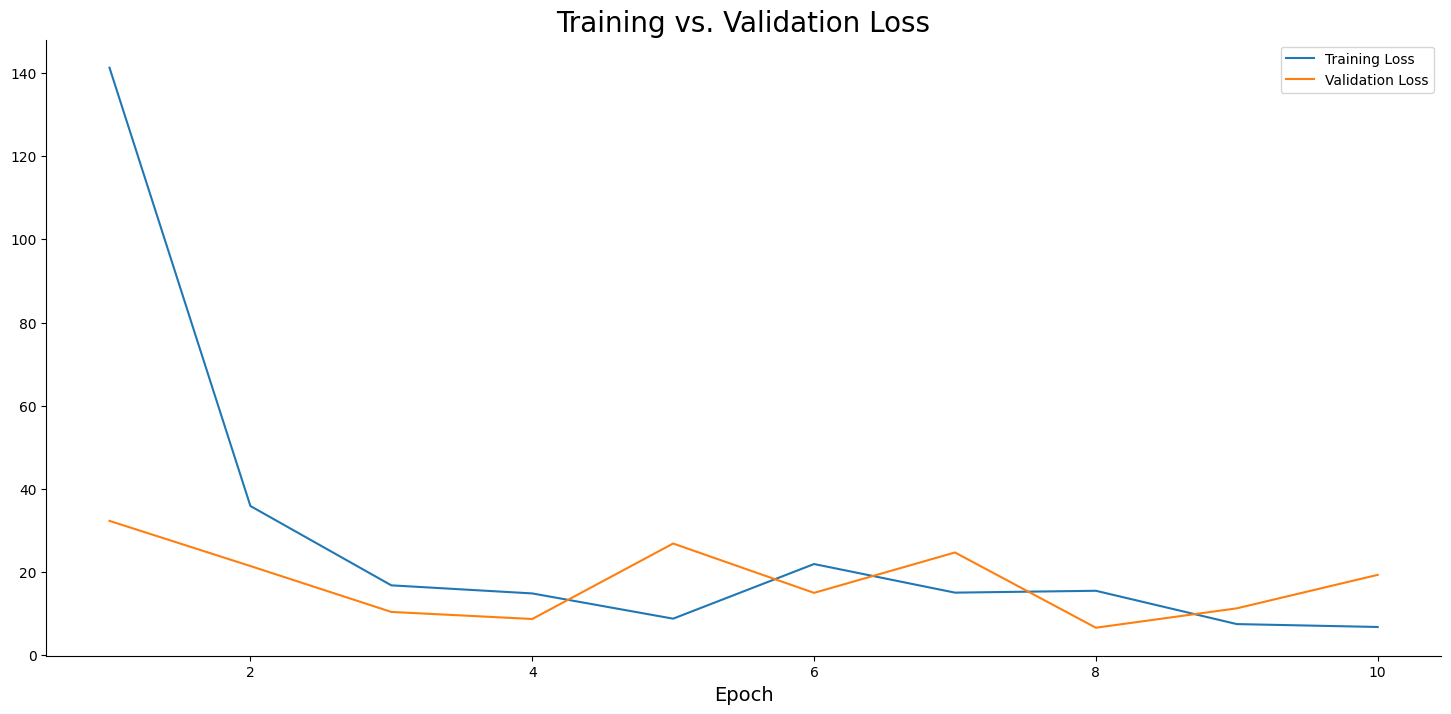

In [13]:
plt.plot(np.arange(1, 11), history_1.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 11), history_1.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

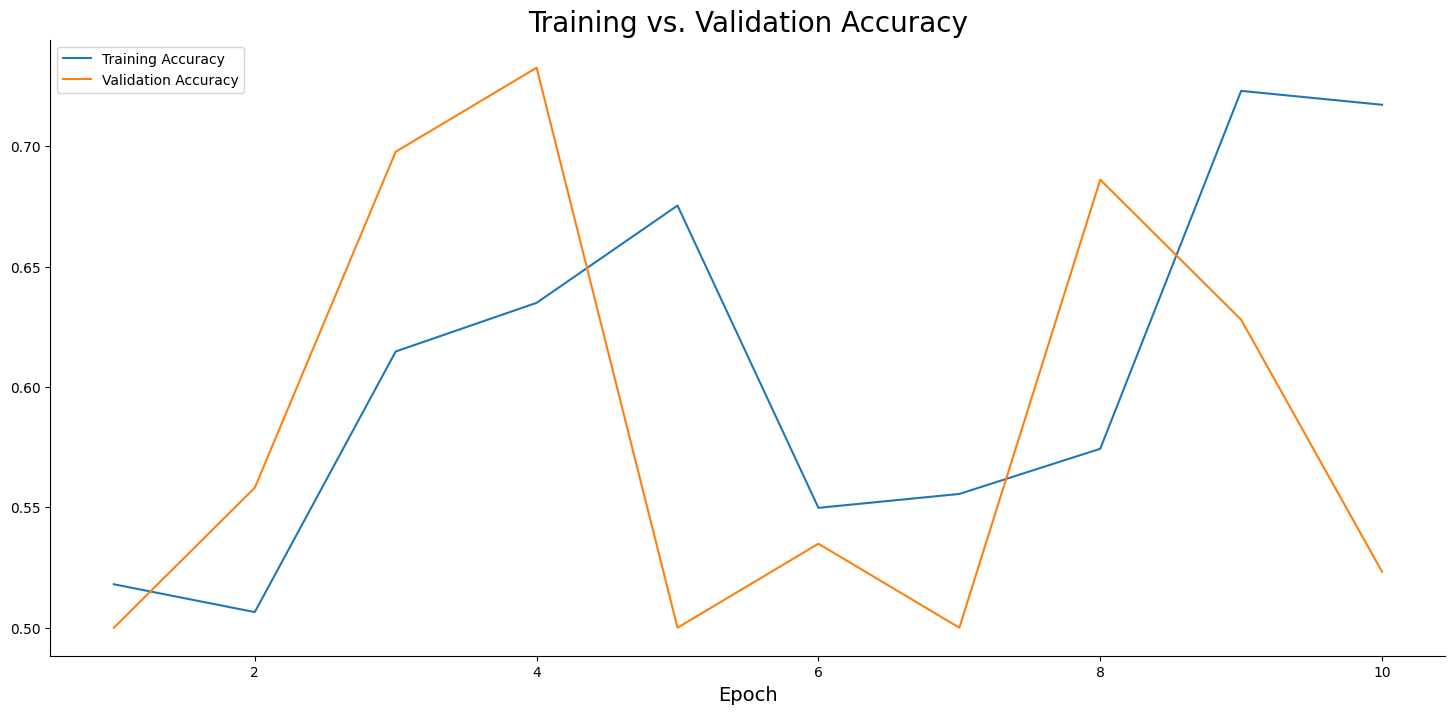

In [14]:
plt.plot(np.arange(1, 11), history_1.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 11), history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
plt.plot(np.arange(1, 11), history_2.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 11), history_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
plt.plot(np.arange(1, 11), history_2.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 11), history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

# Сравните качество бинарной классификации нейронными сетями при помощи матрицы ошибок для тестовой выборки.  

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(test_labels, np.round(abs(model_1.predict(test_images))))

3/3 [==============================] - 1s 191ms/step


array([[43,  0],
       [41,  2]])

In [ ]:
confusion_matrix(test_labels, np.round(abs(model_2.predict(test_images))))

# Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми. 

In [18]:
from sklearn import metrics

3/3 [==============================] - 1s 193ms/step


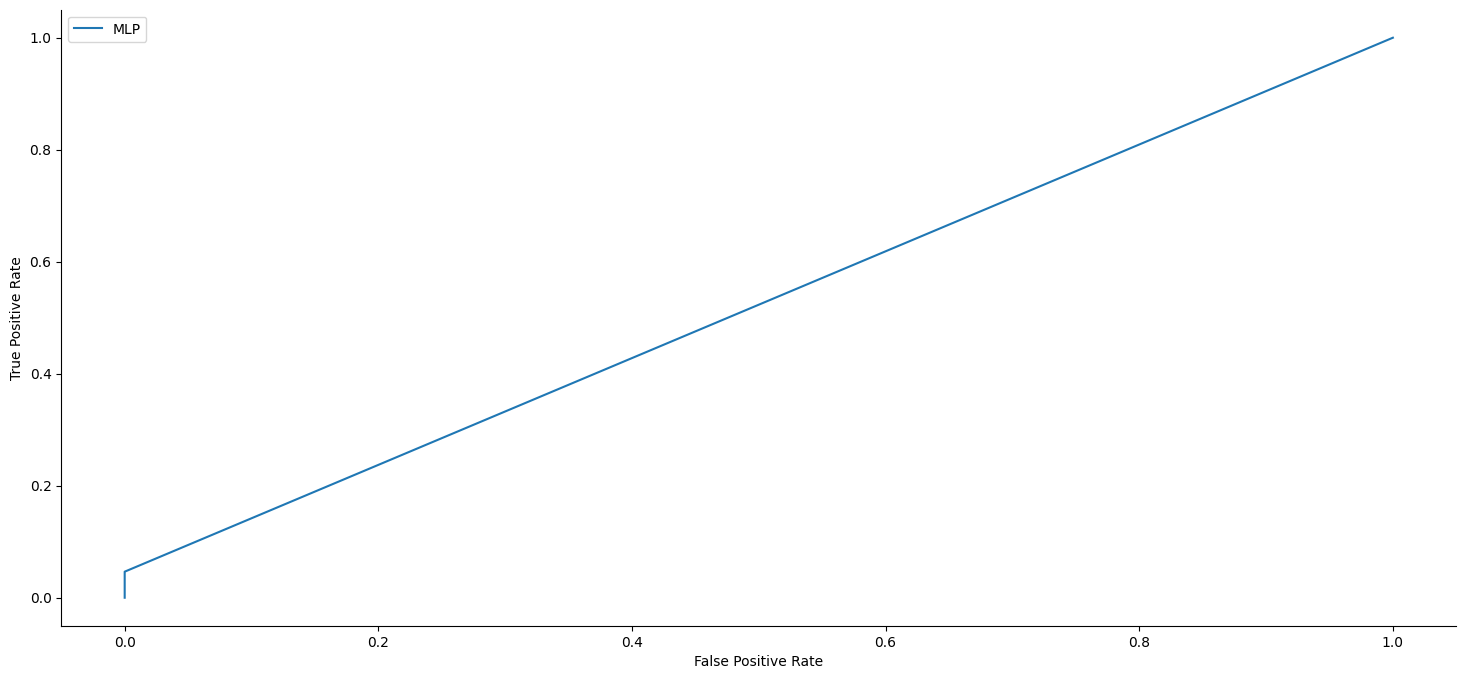

In [21]:
fpr, tpr, _ = metrics.roc_curve(test_labels, np.round(abs(model_1.predict(test_images))), pos_label=1)
#fpr1, tpr1, _ = metrics.roc_curve(test_labels, np.round(abs(model_2.predict(test_images))), pos_label=1)
plt.plot(fpr,tpr, label='MLP')
#plt.plot(fpr1,tpr1, label='CNN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [22]:
metrics.roc_auc_score(test_labels, np.round(abs(model_1.predict(test_images))))#, metrics.roc_auc_score(test_labels, np.round(abs(model_2.predict(test_images))))

3/3 [==============================] - 1s 224ms/step


0.5232558139534884

# Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (архитектура сетей по вашему усмотрению).  

In [23]:
ds = tfds.load("beans", split=['train','test'])
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

((1034, 2), (128, 2))

In [24]:
df_train.iloc[0]['image'].shape

(500, 500, 3)

In [25]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((1034,), (128,))

In [26]:
train_images = np.zeros(shape=(df_train.shape[0],500,500,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],500,500,3), dtype=np.float32)
train_images.shape, test_images.shape

((1034, 500, 500, 3), (128, 500, 500, 3))

In [27]:
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = \
        np.array(Image.fromarray(df_train.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = \
        np.array(Image.fromarray(df_test.iloc[idx]['image']))

train_images.shape, test_images.shape

((1034, 500, 500, 3), (128, 500, 500, 3))

In [28]:
train_images /= 255
test_images  /= 255

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(500, 500, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])
model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
history_1 = model_1.fit(
    train_images,
    np.array(train_labels),
    epochs=15,
    batch_size=64,
    validation_data=(test_images, np.array(test_labels)))

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), input_shape=(500, 500, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])
model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
history_2 = model_2.fit(
    train_images,
    train_labels,
    epochs=15,
    batch_size=64,
    validation_data=(test_images, test_labels))

# Сравните качество многоклассовой классификации нейронными сетями при помощи матрицы ошибок (для трех классов) для тестовой выборки.  

In [1]:
confusion_matrix(test_labels.argmax(axis=1), model_1.predict(test_images).argmax(axis=1))

NameError: ignored

In [ ]:
confusion_matrix(test_labels.argmax(axis=1), model_2.predict(test_images).argmax(axis=1))

# Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. 

In [ ]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, 16), history_1.history['loss'], label='1')
plt.plot(np.arange(1, 16), history_1.history['val_loss'], label='2')
plt.plot(np.arange(1, 16), history_2.history['loss'], label='3')
plt.plot(np.arange(1, 16), history_2.history['val_loss'], label='4')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
plt.plot(np.arange(1, 16), history_1.history['accuracy'], label='1')
plt.plot(np.arange(1, 16), history_1.history['val_accuracy'], label='2')
plt.plot(np.arange(1, 16), history_2.history['accuracy'], label='3')
plt.plot(np.arange(1, 16), history_2.history['val_accuracy'], label='4')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();